# FOR NORMAL DISTRIBUTION

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\yasar beg\AppData\Local\Temp\ipykernel_19220\4168914169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])
C:\Users\yasar beg\AppData\Local\Temp\ipykernel_19220\4168914169.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


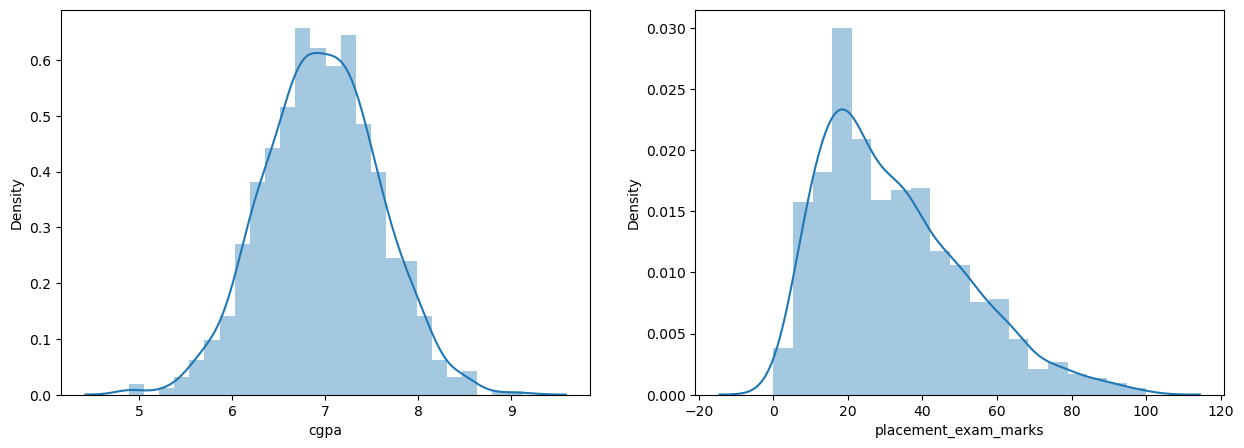

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"])


plt.subplot(1,2,2)
sns.distplot(df["placement_exam_marks"])
plt.show()

In [6]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [7]:
print("upper class",df["cgpa"].mean()+3*df["cgpa"].std())
print("lower class",df["cgpa"].mean()-3*df["cgpa"].std())

upper class 8.808933625397168
lower class 5.113546374602832


In [8]:
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Triming


In [9]:
df[(df["cgpa"]<8.80) & (df["cgpa"]>5.11)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# z_score

In [10]:
df["z_score"]=(df["cgpa"]-df["cgpa"].mean())/df["cgpa"].std()

In [11]:
df.sample()

,cgpa,placement_exam_marks,placed,z_score
245,6.78,62.0,0,-0.29427


In [12]:
df[(df["z_score"]>3) | (df["z_score"]<-3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [13]:
df[(df["z_score"]<3) & (df["z_score"]>-3)]

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [14]:
upper_limit=df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit=df["cgpa"].mean()-3*df["cgpa"].std()

In [15]:
upper_limit

8.808933625397168

In [16]:
lower_limit

5.113546374602832

In [17]:
import numpy as np

In [18]:
df["cgpa"]=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df["cgpa"]<lower_limit,lower_limit,df["cgpa"]))

In [19]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# FOR NON NORMAL DISTRIBUTION

# HANDLING OUTLIER USING BOX PLOT AND IQR

In [20]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


<Axes: >

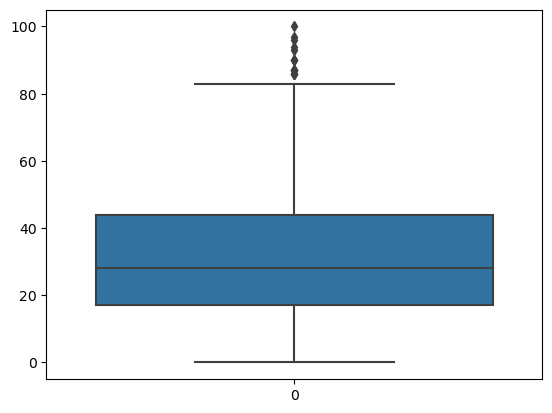

In [21]:
sns.boxplot(df["placement_exam_marks"])

In [22]:
q1=df["placement_exam_marks"].quantile(0.25)
q3=df["placement_exam_marks"].quantile(0.75)

In [23]:
q1,q3

(17.0, 44.0)

In [24]:
iqr=q3-q1

In [25]:
iqr

27.0

In [26]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [27]:
upper_limit,lower_limit

(84.5, -23.5)

In [28]:
df[df["placement_exam_marks"]>upper_limit]

,cgpa,placement_exam_marks,placed,z_score
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [29]:
new_df=df[df["placement_exam_marks"]<upper_limit]

<Axes: >

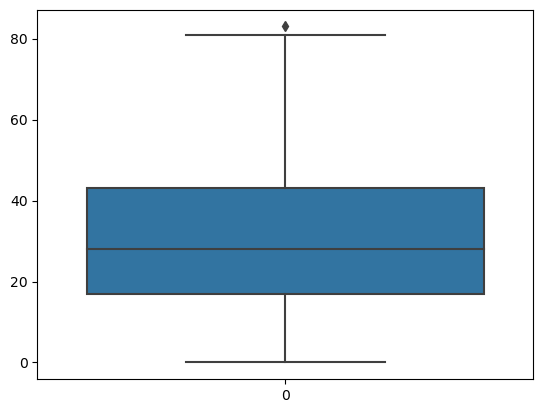

In [30]:
sns.boxplot(new_df["placement_exam_marks"])

# Capping

In [31]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [32]:
df["placement_exam_marks"]=np.where(df["placement_exam_marks"]>upper_limit,upper_limit,np.where(df["placement_exam_marks"]<lower_limit,lower_limit,df["placement_exam_marks"]))

<Axes: >

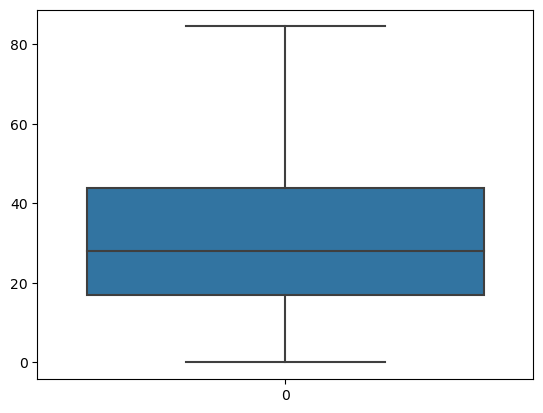

In [33]:
sns.boxplot(df["placement_exam_marks"])

In [34]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


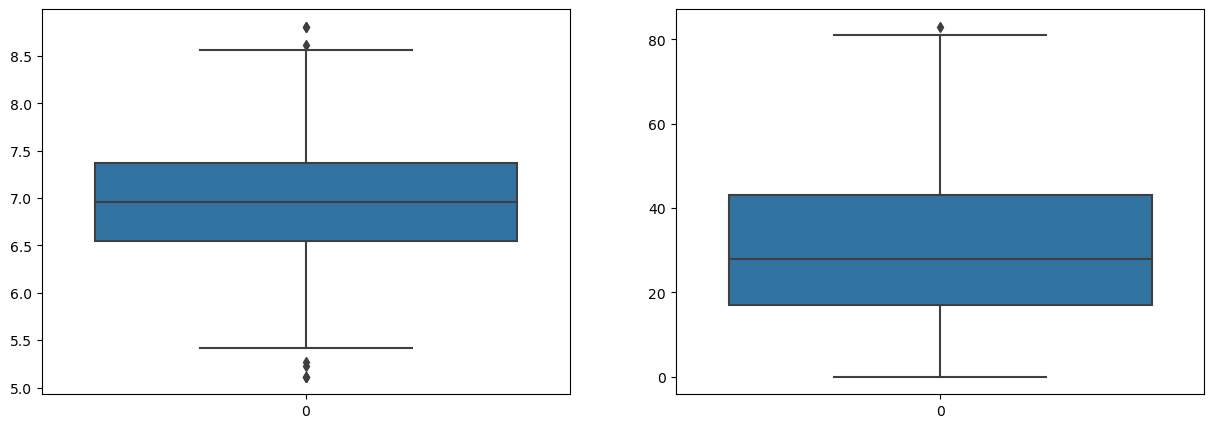

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df["cgpa"])


plt.subplot(1,2,2)
sns.boxplot(new_df["placement_exam_marks"])
plt.show()